# Tax or Trade

#### Notebook for setting up, running and visualising the agent based model

Set the variables within the following ranges:



## Cell 1: Import libraries and set variables




In [1]:
from functions.functions import analysis
from matplotlib import pyplot as plt

runs            = 100  
runLength       = 15        
seed            = 1  

tax             = 30
trade           = 2.5

# preset          = 'fifty'
preset          = 'seventy' 
# preset          = 'ninety'

analysis = analysis(runs, seed, tax, trade, runLength, preset)

## Cell 2: Run the model

The first two lines recompile the program and move it to this directory, keep them commented out if not needed

In [2]:
! cd ../model/ && mvn clean compile assembly:single -q && cd ../analysis/
! mv ../model/target/model-1.0-SNAPSHOT-jar-with-dependencies.jar model.jar && echo "Built and moved the model\n"

args = analysis.getJarArguments()
! cd temp && java -jar ../model.jar $args 

Built and moved the model



## Cell 3: Show the area plots

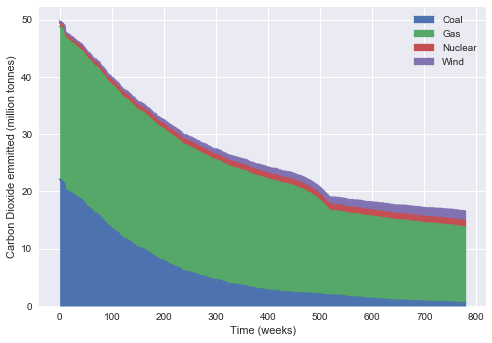

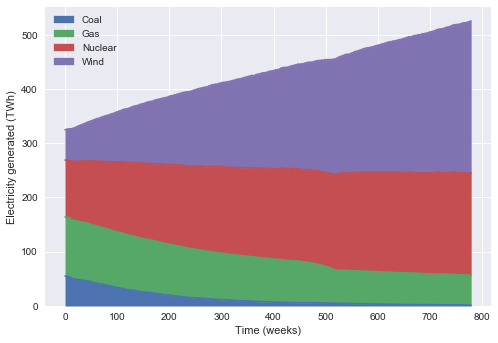

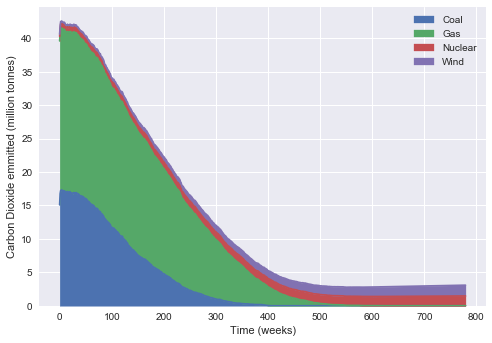

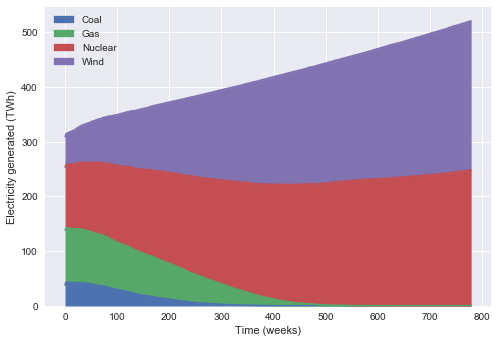

In [3]:
analysis.plotArea()
plt.show()

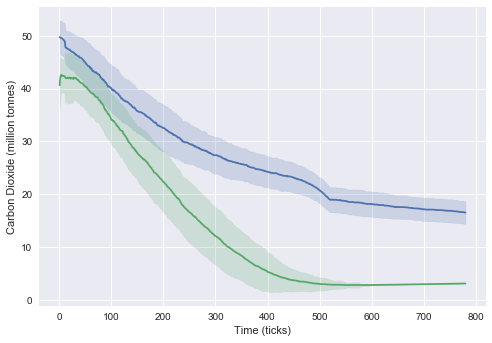

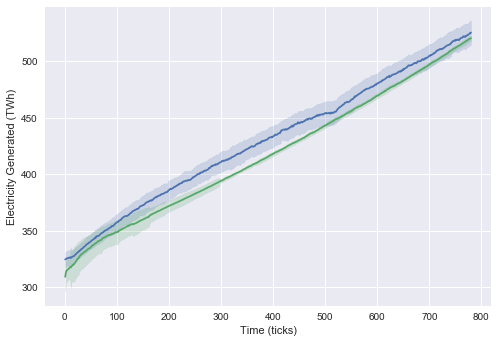

In [4]:
analysis.plotComparison()

## Cleanup

Leave uncommented to automatically remove the csvs on completion

In [5]:
! rm temp/*.csv && rm temp/clean/*.csv 